In [1]:
from pandas import *
import pandas #generally: import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# ipython notebook --pylab=inline

def side_by_side(*objs, **kwds):
    from pandas.core.common import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print(adjoin(space, *reprs))

plt.rc('figure', figsize=(10, 6))
# pandas.set_printoptions(notebook_repr_html=False)

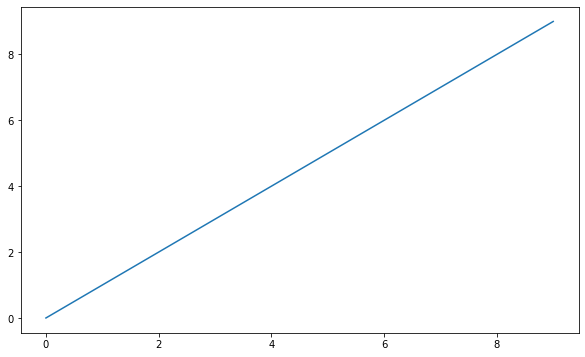

In [2]:
plt.plot(range(10))

Series
======

In [3]:
np.random.randn(5)

array([-0.7699983 , -0.58350227,  0.90155128, -0.28516772, -1.1847302 ])

In [4]:
labels = ['a', 'b', 'c', 'd', 'e']
s = Series(np.random.randn(5), index=labels)
s

a    1.320036
b   -0.330983
c   -1.057988
d   -0.365876
e   -1.034862
dtype: float64

In [5]:
'b' in s

True

In [6]:
s['b']

-0.33098319747229843

In [7]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [8]:
s

a    1.320036
b   -0.330983
c   -1.057988
d   -0.365876
e   -1.034862
dtype: float64

In [9]:
mapping = s.to_dict()
mapping

{'a': 1.320036078782292,
 'b': -0.33098319747229843,
 'c': -1.0579880297545339,
 'd': -0.36587599699579876,
 'e': -1.0348618493813764}

In [10]:
s = Series(mapping, index=['b', 'e', 'a', 'd', 'f'])
s

b   -0.330983
e   -1.034862
a    1.320036
d   -0.365876
f         NaN
dtype: float64

In [11]:
s[notnull(s)]
#isnull is the opposite of notnull and gives only the null objects/data.
#isnand only works on floating point arrays

b   -0.330983
e   -1.034862
a    1.320036
d   -0.365876
dtype: float64

In [12]:
#same as notnull(s), removes NaN from data
s.dropna()

b   -0.330983
e   -1.034862
a    1.320036
d   -0.365876
dtype: float64

In [13]:
#operations
s * 2

b   -0.661966
e   -2.069724
a    2.640072
d   -0.731752
f         NaN
dtype: float64

In [14]:
#slice
s[:3]

b   -0.330983
e   -1.034862
a    1.320036
dtype: float64

In [15]:
s.index

Index(['b', 'e', 'a', 'd', 'f'], dtype='object')

DataFrame: 2D collection of Series
==================================

In [16]:
df = DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)})
df['d'] = range(6)
df

,a,b,c,d
0,0.520686,foo,-0.527746,0
1,-0.027422,bar,0.045051,1
2,-1.018962,foo,-1.259379,2
3,0.019268,bar,0.385844,3
4,-2.576314,foo,-1.043483,4
5,0.505537,bar,0.627181,5


In [17]:
df['b']    # by column

0    foo
1    bar
2    foo
3    bar
4    foo
5    bar
Name: b, dtype: object

In [18]:
# Slice Row
df[:3]

,a,b,c,d
0,0.520686,foo,-0.527746,0
1,-0.027422,bar,0.045051,1
2,-1.018962,foo,-1.259379,2


In [19]:
df[:-2] # stop 2 before last rows

,a,b,c,d
0,0.520686,foo,-0.527746,0
1,-0.027422,bar,0.045051,1
2,-1.018962,foo,-1.259379,2
3,0.019268,bar,0.385844,3


In [20]:
# Slice Row
df[-2:]   # the last 2 rows

,a,b,c,d
4,-2.576314,foo,-1.043483,4
5,0.505537,bar,0.627181,5


In [21]:
np.tile(['foo', 'bar'], 3)   # in numpy

array(['foo', 'bar', 'foo', 'bar', 'foo', 'bar'], dtype='<U3')

In [22]:
df.xs(0)   # returning the first row

a    0.520686
b         foo
c   -0.527746
d           0
Name: 0, dtype: object

In [23]:
df.ix[2]    # does equal thing as above. In this case, 3rd row. 

D:\Users\cduon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


a   -1.01896
b        foo
c   -1.25938
d          2
Name: 2, dtype: object

In [24]:
df.ix[2, 'b']

D:\Users\cduon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


'foo'

In [25]:
df.get_value(2, 'b')

D:\Users\cduon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


'foo'

In [26]:
#timeit gives you time of functions
timeit df.ix[2, 'b']

SyntaxError: invalid syntax (<ipython-input-26-02240d37dd27>, line 2)

In [ ]:
#timeit df.get_value is faster than df.ix
timeit df.get_value(2, 'b')

In [ ]:
#Slice rows, column
df.ix[2:4, 'b']

In [ ]:
#slice rows, columns
df.ix[2:4, ['b', 'c']]

In [ ]:
df.ix[2:4, 'b':'c']   # slices by column - essentially the same as above.

In [ ]:
df.ix[[0, 2, 4], ['b', 'c', 'd']]   # pass a list of rows and columns I want to select out

In [ ]:
df['c'] > 0

In [ ]:
# Slice with Boolean array
df.ix[df['c'] > 0]   # boolean arrays

In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
df = DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)},
               index=DateRange('1/1/2000', periods=6))
df

In [ ]:
df = DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)},
               columns=['a', 'b', 'c', 'd'])
df

In [ ]:
isnull(df)

Creation from nested dicts
--------------------------

These arise naturally in Python code

In [ ]:
# Nested dictionary
data = {}
for col in ['foo', 'bar', 'baz']:
    for row in ['a', 'b', 'c', 'd']:
        data.setdefault(col, {})[row] = randn()   # sorted cols: bar, baz, foo
data

In [ ]:
del data ['foo']['c']   # delete an entry by index key (col) and row.

In [ ]:
DataFrame(data)   # pass a dict 

Data alignment
==============

In [ ]:
close_px = pandas.read_csv('stock_data.csv', index_col=0, parse_dates=True)

In [ ]:
!head -n 10 stock_data.csv

In [ ]:
close_px

In [ ]:
s1 = close_px['AAPL'][-20:]      # the last 20 rows
s2 = close_px['AAPL'][-25:-10]   # the last 25 - last 10 = 15 rows.
side_by_side(s1, s2)

In [ ]:
s1 + s2

In [ ]:
#fills a zero for addition of objects between s1, number and s2, NaN, results in s1 number
s1.add(s2, fill_value=0)

In [ ]:
(s1 + s2).dropna()

In [ ]:
df = close_px.ix[-10:, :3]
df

In [ ]:
side_by_side(s1.reindex(s2.index), s2)   # align indexes of s1 and s2. Print 2 objects alongside each other.

In [ ]:
side_by_side(s1.ix[s2.index], s2)   # same as above, supported in newer version of 0.12 ipython.

In [ ]:
b, c  = s1.align(s2, join='inner')
side_by_side(b, c)

In [ ]:
b, c  = s1.align(s2, join='outer')
side_by_side(b, c)

In [ ]:
b, c  = s1.align(s2, join='right')
side_by_side(b, c)

In [ ]:
df = close_px.ix[-10:, ['AAPL', 'IBM', 'MSFT']]
df

In [ ]:
df2 = df.ix[::2, ['IBM', 'MSFT']]
side_by_side(df, df2)

In [ ]:
df + df2

In [ ]:
b, c = df.align(df2, join='inner')
side_by_side(b, c) 

Transposing: no copy if all columns are same type
-------------------------------------------------

In [ ]:
df[:5].T

Columns can be any type
-----------------------

In [ ]:
n = 10
foo = DataFrame(index=range(n))
foo['floats'] = np.random.randn(n)
foo['ints'] = np.arange(n)
foo['strings'] = ['foo', 'bar'] * (n / 2)
foo['bools'] = foo['floats'] > 0
foo['objects'] = DateRange('1/1/2000', periods=n)
foo

In [ ]:
foo.dtypes

N.B. transposing is not roundtrippable in this case (column-oriented data structure)

In [ ]:
foo.T.T

In [ ]:
foo.T.T.dtypes

Function application
====================

You can apply arbitrary functions to the rows or columns of a DataFrame

In [ ]:
df.apply(np.mean)

In [ ]:
df.mean()   # same as above.   df.mean? to look up the function usage.

In [ ]:
df.mean(1)   # get the mean of the rows based on a column. Also excludes missing data (NaN: not a number).

In [ ]:
df.mean(1, skipna=False)   # flag skipna: to include NaN. In this data, no NaN.

In [ ]:
df.apply(np.mean, axis=1)   # same as above.

You can get as fancy as you want

In [ ]:
close_px    # Output: 1000 rows.

In [ ]:
close_px.AAPL     # For easier typing, after dot ., use tab to select the name of the stock.

In [ ]:
close_px.AAPL.idxmax() # gives index of its maximum value.

In [ ]:
close_px.AAPL.index[close_px.AAPL.argmax()]    # If you are numpy aficionado, does the same thing.

In [ ]:
def peak_date(series):
    return series.index[series.argmax()]    # new method: series.idxmax()
close_px.apply(peak_date)

In [ ]:
df.apply(lambda x: x.max() - x.min()) # np.ptp

In [ ]:
np.log(close_px)

Plotting
========

Some basic plotting integration with matplotlib in Series / DataFrame

In [ ]:
close_px[['AAPL', 'IBM', 'MSFT', 'XOM']]#.plot()    # Can pass a list of col names to get items, so you don't have to use ix.

In [ ]:
close_px[['AAPL', 'IBM', 'MSFT', 'XOM']].plot() 

In [ ]:
close_px.ix[-1]

In [ ]:
close_px.ix[-1].plot(kind='bar')    # the last row of the data.
title('Prices on %s' % close_px.index[-1])
axhline(0)

Hierarchical indexing
---------------------

In [ ]:
index = MultiIndex(levels=[['foo', 'bar', 'baz', 'qux'],
                                   ['one', 'two', 'three']],
                           labels=[[0, 0, 0, 1, 1, 2, 2, 3, 3, 3],
                                   [0, 1, 2, 0, 1, 1, 2, 0, 1, 2]])
hdf = DataFrame(np.random.randn(10, 3), index=index,
                columns=['A', 'B', 'C'])
hdf

In [ ]:
hdf.ix['foo']

In [ ]:
hdf.ix['foo'] = 0
hdf

In [ ]:
hdf.ix['foo', 'three']

Stacking and unstacking
-----------------------

In [ ]:
tuples = zip(*[['bar', 'bar', 'baz', 'baz',
                'foo', 'foo', 'qux', 'qux'],
               ['one', 'two', 'one', 'two',
                'one', 'two', 'one', 'two']])
index = MultiIndex.from_tuples(tuples)
columns = MultiIndex.from_tuples([('A', 'cat'), ('B', 'dog'),
                                  ('B', 'cat'), ('A', 'dog')])
df = DataFrame(randn(8, 4), index=index, columns=columns)
df

In [ ]:
df2 = df.ix[[0, 1, 2, 4, 5, 7]]
df2

In [ ]:
df.unstack()['B']

GroupBy
=======

In [ ]:
df = DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                'B' : ['one', 'one', 'two', 'three',
                       'two', 'two', 'one', 'three'],
                'C' : np.random.randn(8),
                'D' : np.random.randn(8)})
df

In [ ]:
for key, group in df.groupby('A'):
    print(key)
    print(group)

In [ ]:
df.groupby('A')['C'].describe().T

In [ ]:
df.groupby('A').mean()

In [ ]:
for key, group in df.groupby('A'):
    print key
    print group

In [ ]:
df.groupby(['A', 'B']).mean()

In [ ]:
df.groupby(['A', 'B'], as_index=False).mean()

GroupBy example: linear regression by group
-------------------------------------------

In [ ]:
import scikits.statsmodels.api as sm
rets = close_px / close_px.shift(1) - 1

def get_beta(rets):
    rets = rets.dropna()
    rets['intercept'] = 1.
    model = sm.OLS(rets['MSFT'], rets.ix[:, ['AAPL', 'intercept']]).fit()
    return model.params

get_beta(rets)

In [ ]:
grouped = rets.groupby([lambda x: x.year, lambda x: x.month])
beta_by_ym = grouped.apply(get_beta)
beta_by_ym

In [ ]:
beta_by_ym.unstack(0)['AAPL']

GroupBy with hierarchical indexing
----------------------------------

In [ ]:
tuples = zip(*[['bar', 'bar', 'baz', 'baz',
                'foo', 'foo', 'qux', 'qux'],
               ['one', 'two', 'one', 'two',
                'one', 'two', 'one', 'two']])
index = MultiIndex.from_tuples(tuples)
columns = MultiIndex.from_tuples([('A', 'cat'), ('B', 'dog'),
                                  ('B', 'cat'), ('A', 'dog')])
df = DataFrame(randn(8, 4), index=index, columns=columns)
df

In [ ]:
df.groupby(level=0, axis=0).mean()

In [ ]:
df.stack()

In [ ]:
df.stack().mean(1).unstack()

In [ ]:
# could also have done
df.groupby(level=1, axis=1).mean()